In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import sklearn
import statsmodels
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import requests
import pprint
import xgboost
import scipy
from datetime import datetime
from scipy import stats
from xgboost import XGBClassifier
from urllib import parse
from bs4 import BeautifulSoup

# ÏßÄÏàò ÌòïÌÉúÏùò Ïã§ÏàòÎ•º ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨ÍπåÏßÄ ÌëúÍ∏∞
pd.options.display.float_format = "{:.3f}".format

# Í≥µÏú† Ìè¥Îçî Í≤ΩÎ°ú(ÎÇòÏ§ëÏóê Í≤ΩÎ°ú Î≥ÄÍ≤Ω)
dirShare = "G:/.shortcut-targets-by-id/188U2ypi3eUvuInaixMTTbbFctprRo9e4/GYMÏÇ¥ÎùºÎπî"


In [135]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ ÌôïÏù∏
print("pandas ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + pd.__version__)
print("scikit-learn ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + sklearn.__version__)
print("scipy ÌòÑÏû¨ Î≤ÑÏ†Ñ : "+ scipy.__version__)
print("statsmodels ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + statsmodels.__version__)
print("xgboost ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + xgboost.__version__)

pandas ÌòÑÏû¨ Î≤ÑÏ†Ñ : 2.0.3
scikit-learn ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.3.0
scipy ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.11.1
statsmodels ÌòÑÏû¨ Î≤ÑÏ†Ñ : 0.14.0
xgboost ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.7.6


# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í≥† Ï†ÑÏ≤òÎ¶¨

## Í∏∞Î≥∏Ï†ÑÏ≤òÎ¶¨

In [136]:
# def pre_data(datadir=None) : 
#     df = pd.read_csv(datadir)
#     df["ownerChange"].replace({"same":0},inplace=True)
#     df["ownerChange"].replace({"change":1},inplace=True)
#     df = pd.get_dummies(df, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)
#     df.dropna(axis=0, how="any", inplace=True)


In [137]:
# train.csv Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(dirShare+"/data/train.csv")

# df Ï†ïÎ≥¥ ÌôïÏù∏
# df.info()

# df ÏÉÅÏúÑ 10Í∞ú Î∂àÎü¨Ïò§Í∏∞
# df.head(10)

In [138]:
# X_t = pd.read_csv(dirShare+"/data/test.csv")

# X_t.info()
# X_t.head()

In [139]:
# X_t.shape[0] - X_t.count()

In [140]:
# Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏ÌïòÍ∏∞
print("Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ", df.shape[0])

# len(df)Î•º Ïç®ÎèÑ ÎèôÏùº

Îç∞Ïù¥ÌÑ∞ Í∞úÏàò :  301


In [141]:
# Ïà´Ïûê ÌòïÏãùÏùò Ïª¨ÎüºÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÍ∞íÏùÑ Ï∂úÎ†•
# df.describe()

In [142]:
# Ïª¨ÎüºÎ≥Ñ null Í∞í ÌôïÏù∏ÌïòÍ∏∞
df.shape[0] - df.count()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [143]:
# ÏïÑÏßÅ Ïö¥ÏòÅ Ï§ëÏù∏ Î≥ëÏõêÏùÑ 1Î°ú Î≥ÄÌôò
df.replace({"open":1},inplace=True)
# ÌèêÏóÖÌïú Î≥ëÏõêÏùÑ 0ÏúºÎ°ú Î≥ÄÌôò
df.replace({" close":0}, inplace=True)
# unique() Î©îÏÑúÎìúÎ•º ÌÜµÌï¥ "OC" Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏
# df["OC"].unique()

In [144]:
# Ïò§ÎÑà Î≥ÄÌôò Ïó¨Î∂Ä
df["ownerChange"].replace({"same":0},inplace=True)
df["ownerChange"].replace({"change":1},inplace=True)
# df["ownerChange"].unique()

In [145]:
df["instkind"].unique()

array(['nursing_hospital', 'general_hospital', 'hospital',
       'traditional_clinic', 'clinic', 'traditional_hospital',
       'dental_clinic', nan], dtype=object)

In [146]:
df_clst = df[["OC", "bedCount", "profit1", "surplus1", "profit2", "surplus2", 
                  "employee1", "employee2", "instkind", "sido"]]

df_clst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OC         301 non-null    int64  
 1   bedCount   296 non-null    float64
 2   profit1    293 non-null    float64
 3   surplus1   293 non-null    float64
 4   profit2    293 non-null    float64
 5   surplus2   293 non-null    float64
 6   employee1  291 non-null    float64
 7   employee2  288 non-null    float64
 8   instkind   300 non-null    object 
 9   sido       301 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 23.6+ KB


In [147]:
# Î≥ëÏõêÏùò Ï¢ÖÎ•òÎ•º, get_dummiesÎ•º Ïù¥Ïö©Ìï¥ one-hot-encoding
df = pd.get_dummies(df, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)
df_clst = pd.get_dummies(df_clst, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)

In [148]:
# Í∞úÏóÖÌïú ÎÇ†ÏßúÎäî Î≥ÄÏàòÎ°úÏÑú ÏùòÎØ∏Í∞Ä ÏóÜÏùå. Î™®Îç∏ÏùÄ ÎÇ†ÏßúÎ•º Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÍ∏∞ ÎïåÎ¨∏Ïóê
# Í∞úÏóÖ ÎÇ†ÏßúÏôÄ ÌèêÏóÖ ÎÇ†ÏßúÏùò Ï∞®Ïù¥Î°ú Î≥ÄÏàòÎ•º Ï°∞Ï†ïÌï† ÌïÑÏöîÍ∞Ä ÏûàÏùå

date_of_2018 = "2018-01-01"

# Î¨∏Ïûê ÌÉÄÏûÖÏùÑ date ÌÉÄÏûÖÏúºÎ°ú

df["openDate"] = df["openDate"].apply(lambda x : datetime.strptime(str(x), "%Y%m%d"))

# ÎÇ†Ïßú Ï∞®Ïù¥Î•º ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú ÏÉùÏÑ±, Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Ï§ëÍ∞ÑÏóê ÏÇΩÏûÖ
df.insert(1, "dif_date", datetime.strptime(date_of_2018,"%Y-%m-%d")-df["openDate"])
df["dif_date"] = df["dif_date"].dt.days

df["dif_date"].tail()

296     4707
297     1293
298    12599
299     4018
300     5920
Name: dif_date, dtype: int64

In [149]:
df_clst.insert(1, column="dif_date", value=df["dif_date"])
df_clst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OC                             301 non-null    int64  
 1   dif_date                       301 non-null    int64  
 2   bedCount                       296 non-null    float64
 3   profit1                        293 non-null    float64
 4   surplus1                       293 non-null    float64
 5   profit2                        293 non-null    float64
 6   surplus2                       293 non-null    float64
 7   employee1                      291 non-null    float64
 8   employee2                      288 non-null    float64
 9   sido                           301 non-null    object 
 10  instkind_clinic                301 non-null    int32  
 11  instkind_dental_clinic         301 non-null    int32  
 12  instkind_general_hospital      301 non-null    int

In [150]:
# ÏòÅÏñ¥Î°ú Îèº ÏûàÎäî 'ÏãúÎèÑ'Î•º ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò

df["sido"].replace(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong'], 
       ["Ï∂©Ï≤≠ÎÇ®ÎèÑ", "Í≤ΩÏÉÅÎÇ®ÎèÑ", "Í≤ΩÍ∏∞ÎèÑ", "Ïù∏Ï≤úÍ¥ëÏó≠Ïãú", 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 
        'Ï†ÑÎùºÎ∂ÅÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', "Í≤ΩÏÉÅÎ∂ÅÎèÑ", "Í∞ïÏõêÎèÑ", "Í¥ëÏ£ºÍ¥ëÏó≠Ïãú", "ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú"],inplace=True)

df_clst["sido"].replace(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong'], 
       ["Ï∂©Ï≤≠ÎÇ®ÎèÑ", "Í≤ΩÏÉÅÎÇ®ÎèÑ", "Í≤ΩÍ∏∞ÎèÑ", "Ïù∏Ï≤úÍ¥ëÏó≠Ïãú", 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 
        'Ï†ÑÎùºÎ∂ÅÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', "Í≤ΩÏÉÅÎ∂ÅÎèÑ", "Í∞ïÏõêÎèÑ", "Í¥ëÏ£ºÍ¥ëÏó≠Ïãú", "ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú"],inplace=True)

print("dfÏùò ÏãúÎèÑ : ",df["sido"].unique())
print("df_clstÏùò ÏãúÎèÑ : ",df_clst["sido"].unique())

dfÏùò ÏãúÎèÑ :  ['Ï∂©Ï≤≠ÎÇ®ÎèÑ' 'Í≤ΩÏÉÅÎÇ®ÎèÑ' 'Í≤ΩÍ∏∞ÎèÑ' 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú' 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú' 'Ï†ÑÎùºÎÇ®ÎèÑ' 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú' 'Ï†ÑÎùºÎ∂ÅÎèÑ' 'Ï∂©Ï≤≠Î∂ÅÎèÑ' 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú'
 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú' 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú' 'Í≤ΩÏÉÅÎ∂ÅÎèÑ' 'Í∞ïÏõêÎèÑ' 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú' 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú']
df_clstÏùò ÏãúÎèÑ :  ['Ï∂©Ï≤≠ÎÇ®ÎèÑ' 'Í≤ΩÏÉÅÎÇ®ÎèÑ' 'Í≤ΩÍ∏∞ÎèÑ' 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú' 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú' 'Ï†ÑÎùºÎÇ®ÎèÑ' 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú' 'Ï†ÑÎùºÎ∂ÅÎèÑ' 'Ï∂©Ï≤≠Î∂ÅÎèÑ' 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú'
 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú' 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú' 'Í≤ΩÏÉÅÎ∂ÅÎèÑ' 'Í∞ïÏõêÎèÑ' 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú' 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú']


## Ïã¨ÌôîÏ†ÑÏ≤òÎ¶¨

In [151]:
# 2017ÎÖÑ ÏßÄÏó≠Î≥Ñ Ïù∏Íµ¨Ïàò Îç∞Ïù¥ÌÑ∞
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3
pop = pd.read_csv(dirShare+"/data/ÌñâÏ†ïÍµ¨Ïó≠_ÏãúÍµ∞Íµ¨_Î≥Ñ__ÏÑ±Î≥Ñ_Ïù∏Íµ¨Ïàò_20230718231833.csv", header=1, encoding="cp949")
pop.info()
pop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ  18 non-null     object
 1   Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)    18 non-null     int64 
 2   ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)   18 non-null     int64 
 3   Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)   18 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 708.0+ bytes


ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ  Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)  ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)  Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)
0         Ï†ÑÍµ≠  51778544   25855919   25922625
1      ÏÑúÏö∏ÌäπÎ≥ÑÏãú   9857426    4830206    5027220
2      Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú   3470653    1709508    1761145
3      ÎåÄÍµ¨Í¥ëÏó≠Ïãú   2475231    1227814    1247417
4      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú   2948542    1479597    1468945

In [152]:
# dfÏôÄ pop(Ïù∏Íµ¨Ïàò) join
df_new = pd.merge(df, pop, how="inner", left_on="sido", right_on="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ")
df_clst = pd.merge(df_clst, pop, how="inner", left_on="sido", right_on="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ")
print(df_new.head())
print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")
print(df_clst.head())

   inst_id  dif_date  OC  sido  sgg   openDate  bedCount        revenue1  \
0        1      3657   1  Ï∂©Ï≤≠ÎÇ®ÎèÑ   73 2007-12-28   175.000  4217530010.000   
1       59      1385   1  Ï∂©Ï≤≠ÎÇ®ÎèÑ   94 2014-03-18   258.000  8546126935.000   
2      101     13026   1  Ï∂©Ï≤≠ÎÇ®ÎèÑ   37 1982-05-04   341.000 52626386641.000   
3      134     10804   1  Ï∂©Ï≤≠ÎÇ®ÎèÑ   78 1988-06-03    64.000  4402779495.000   
4      150      1589   1  Ï∂©Ï≤≠ÎÇ®ÎèÑ   94 2013-08-26   186.000  5237992090.000   

       salescost1            sga1  ...  instkind_dental_clinic  \
0           0.000  3961134739.000  ...                       0   
1           0.000  6737509250.000  ...                       0   
2 19326736791.000 32214235859.000  ...                       0   
3   719458530.000  4131517858.000  ...                       0   
4           0.000  5060655115.000  ...                       0   

   instkind_general_hospital  instkind_hospital  instkind_nursing_hospital  \
0                          0

In [153]:
# ÏãúÎèÑÎ•º one-hot-encoding
df_new = pd.get_dummies(df_new, columns=["sido"], prefix=["sido"], prefix_sep="_", dtype=int)
df_clst = pd.get_dummies(df_clst, columns=["sido"], prefix=["sido"], prefix_sep="_", dtype=int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   inst_id                        301 non-null    int64         
 1   dif_date                       301 non-null    int64         
 2   OC                             301 non-null    int64         
 3   sgg                            301 non-null    int64         
 4   openDate                       301 non-null    datetime64[ns]
 5   bedCount                       296 non-null    float64       
 6   revenue1                       293 non-null    float64       
 7   salescost1                     293 non-null    float64       
 8   sga1                           293 non-null    float64       
 9   salary1                        293 non-null    float64       
 10  noi1                           293 non-null    float64       
 11  noe1               

In [154]:
# Î≥ëÏõê Íµ∞ÏßëÏùÑ ÌÜµÌï¥ Í≤∞Ï∏°Ïπò ÏòàÏ∏°ÏùÑ ÌïòÍ≥†Ïûê Ìï®, surplus1 / 2, profit1 / 2, employee 1 / 2
df_clst.drop(columns="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ", axis=1, inplace=True)

df_clst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OC                             301 non-null    int64  
 1   dif_date                       301 non-null    int64  
 2   bedCount                       296 non-null    float64
 3   profit1                        293 non-null    float64
 4   surplus1                       293 non-null    float64
 5   profit2                        293 non-null    float64
 6   surplus2                       293 non-null    float64
 7   employee1                      291 non-null    float64
 8   employee2                      288 non-null    float64
 9   instkind_clinic                301 non-null    int32  
 10  instkind_dental_clinic         301 non-null    int32  
 11  instkind_general_hospital      301 non-null    int32  
 12  instkind_hospital              301 non-null    int

In [155]:
# NaN Í∞íÏù¥ ÏóÜÎäî Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í∏∞
df_kmeans = df_clst.dropna(axis=1, how="any")
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   OC                             301 non-null    int64
 1   dif_date                       301 non-null    int64
 2   instkind_clinic                301 non-null    int32
 3   instkind_dental_clinic         301 non-null    int32
 4   instkind_general_hospital      301 non-null    int32
 5   instkind_hospital              301 non-null    int32
 6   instkind_nursing_hospital      301 non-null    int32
 7   instkind_traditional_clinic    301 non-null    int32
 8   instkind_traditional_hospital  301 non-null    int32
 9   Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)                       301 non-null    int64
 10  ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)                      301 non-null    int64
 11  Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)                      301 non-null    int64
 12  sido_Í∞ïÏõêÎèÑ                       301 non

## kmeansÎ•º ÌÜµÌïú Î≥ëÏõê ÏÑ∏Í∑∏Î®ºÌä∏ Íµ∞Ïßë

In [157]:
def visualize_silhouette(cluster_lists, X_features): 

    import matplotlib.cm as cm
    import math

    # ÏûÖÎ†•Í∞íÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î∞õÏïÑÏÑú, Í∞Å Í∞ØÏàòÎ≥ÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ Ï†ÅÏö©ÌïòÍ≥† Ïã§Î£®Ïó£ Í∞úÏàòÎ•º Íµ¨Ìï®
    n_cols = len(cluster_lists)

    # plt.subplots()ÏúºÎ°ú Î¶¨Ïä§Ìä∏Ïóê Í∏∞Ïû¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÎßåÌÅºÏùò sub figuresÎ•º Í∞ÄÏßÄÎäî axs ÏÉùÏÑ± 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # Î¶¨Ïä§Ìä∏Ïóê Í∏∞Ïû¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎì§ÏùÑ Ï∞®Î°ÄÎ°ú iteration ÏàòÌñâÌïòÎ©¥ÏÑú Ïã§Î£®Ïó£ Í∞úÏàò ÏãúÍ∞ÅÌôî
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâÌïòÍ≥†, Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ÏôÄ Í∞úÎ≥Ñ Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Î£®Ïó£ Í∞í Í≥ÑÏÇ∞. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎ≥ÑÎ°ú fill_betweenx( )ÌòïÌÉúÏùò ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÌëúÌòÑ. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [158]:
scaler1 = MinMaxScaler()

scalerX1 = scaler1.fit(df_kmeans.iloc[:,1:])

X_mmsc1 = scaler1.transform(df_kmeans.iloc[:,1:])

c:\Users\jhahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jhahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jhahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jhahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

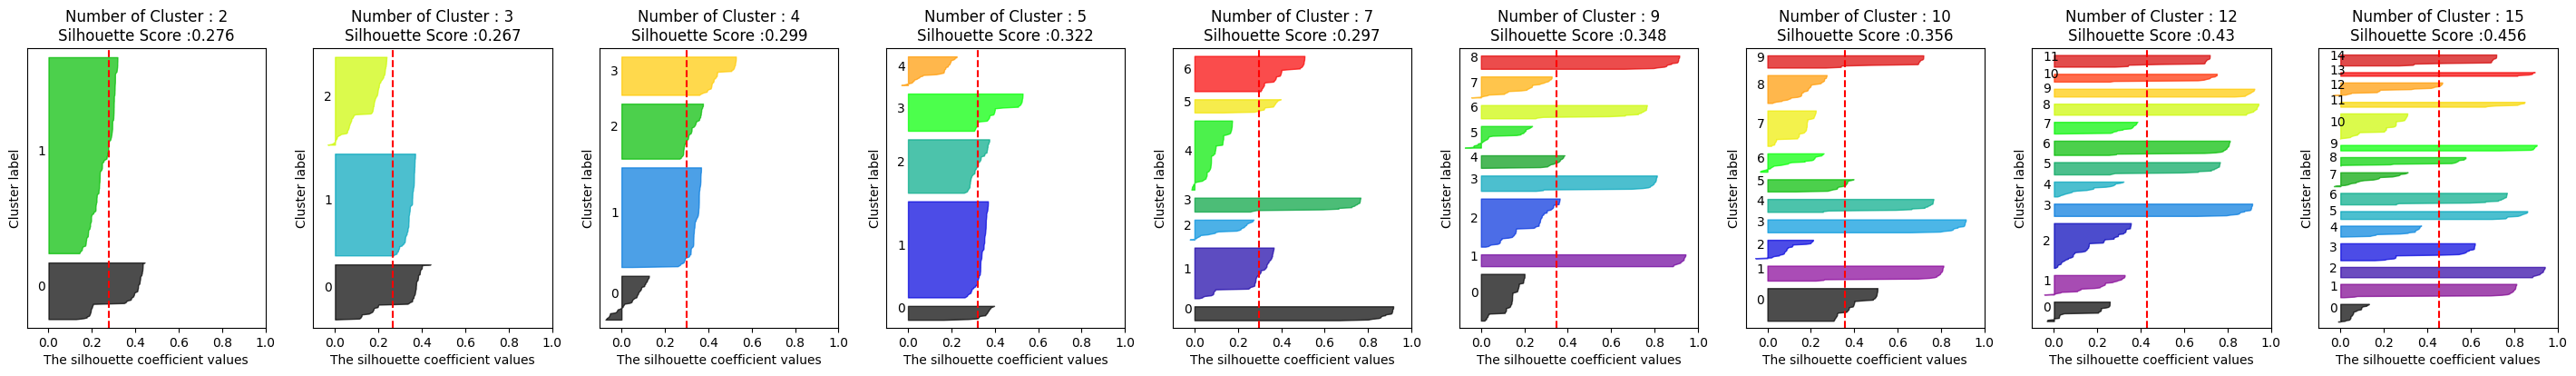

In [160]:
visualize_silhouette([2,3,4,5,7,9,10,12,15], X_mmsc1)
# 15Í∞úÍ∞Ä ÎêêÏùÑ Îïå Ïã§Î£®Ïó£ Í≥ÑÏàòÍ∞Ä 0.356ÏúºÎ°ú ÏµúÎåÄ

In [ ]:
# Î≥ëÏõê Ï†ïÎ≥¥Ïóê NULLÏù¥ Ï°¥Ïû¨ÌïòÎäî Î∂ÄÎ∂ÑÏùÑ Îã§Î•∏ Í∞íÏúºÎ°ú ÎåÄÏ≤¥Ìï† Ïàò ÏóÜÏùå
# Î≥ëÏõêÏùò Îß§Ï∂ú, ÎπÑÏö©, Ïù¥Ïùµ, ÏßÅÏõê ÏàòÏôÄ Í∞ôÏùÄ Í∞íÏùÑ Îã§Î•∏ Î≥ëÏõêÏùò ÌèâÍ∑†Ïù¥ÎÇò Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎ©¥ Ïïà Îê®
# ÌöåÍ∑ÄÎåÄÏ≤¥Î≤ïÏùÑ ÌïòÍ∏∞ÏóêÎäî Ï¢ÖÏÜç Î≥ÄÏàòÎ°ú Îëò ÎßåÌïú ÏÜçÏÑ±Í∞íÏù¥ Ï°¥Ïû¨ X
# nullÏù¥ Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò 10% ÎØ∏ÎßåÏù¥ÎØÄÎ°ú 

df.dropna(axis=0, how="any", inplace=True)
df.shape[0]

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Í∞íÏù¥ 0ÏúºÎ°úÎßå Îèº ÏûàÎäî Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=["receivableL1", "receivableL2"], axis=1, inplace=True)
# ÏãúÍµ∞Íµ¨ ÏΩîÎìú ÏÇ≠Ï†ú
df.drop(columns="sgg", axis=1, inplace=True)
# Î≥ëÏõê idÎäî Î∂ÑÏÑùÏóê ÏûàÏñ¥ÏÑú ÏùòÎØ∏Í∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú ÏÇ≠Ï†ú
df.drop(columns="inst_id",inplace=True)
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóêÏÑú drop ÎêêÎäîÏßÄ ÌôïÏù∏
# df.columns

In [ ]:
df_drop_obj = copy.deepcopy(df)  # ÍπäÏùÄ Î≥µÏÇ¨
df_dr_obj_cols = df_drop_obj.columns.to_list()
# df_dr_obj_cols

ü´°ÏãúÎèÑÏΩîÎìúÏôÄ ÏãúÍµ∞Íµ¨ ÏΩîÎìúÎ•º ÌïôÏäµÏãúÌÇ¨ ÏàòÎèÑ ÏûàÏäµÎãàÎã§.  
One-Hot EncodingÏùÑ Ïù¥Ïö©ÌïòÎ©¥ ÎêòÏ£†.  
ÌïòÏßÄÎßå Ïû¨Î¨¥ Ï†ïÎ≥¥ÏôÄ Í¥ÄÎ†®Îêú ÌòÑ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî ÏùòÎØ∏Í∞Ä ÏóÜÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.  
Í∑∏ Ïù¥Ïú†Îäî ÏßÄÏó≠Ïùò Ïù¥Î¶Ñ ÏûêÏ≤¥Í∞Ä, Î≥ÄÏàòÎ°úÏÑú ÌÅ∞ ÏòÅÌñ•Î†•ÏùÑ Í∞ÄÏßÄÏßÄÎäî ÏïäÏùÑ Í≤É Í∞ôÍ±∞Îì†Ïöî!!  
ÏßÄÏó≠Ïù¥ Î≥ÄÏàòÎ°ú ÏòÅÌñ•ÏùÑ Í∞ÄÏßÄÎ†§Î©¥, Í∑∏ ÏßÄÏó≠Ïùò Î©¥Ï†Å, Ïù∏Íµ¨Î∞ÄÎèÑ, ÌèâÍ∑† ÏÜåÎìùüí∏ Îì±ÏúºÎ°ú ÎåÄÏ≤¥Ìï¥Ïïº Ìï† Í≤É Í∞ôÏäµÎãàÎã§.  
ÏùºÎã® ÏßÄÍ∏àÏùÄ Ïû¨Î¨¥ Ï†ïÎ≥¥Ïóê ÎåÄÌïú Í≤ÉÏúºÎ°úÎßå ÏòàÏ∏°ÏùÑ Ìï¥Î≥¥Ï£†!  

In [ ]:
df_drop_obj2 = copy.deepcopy(df_drop_obj)

# Ïª¨Îüº Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏù¥ 'object'Ïù∏ Ïª¨Îüº ÏÇ≠Ï†ú
for i in range(len(df_dr_obj_cols)) : 
    if df_drop_obj.iloc[:,i].dtype == "object" : 
        df_drop_obj2.drop(columns=df_dr_obj_cols[i], inplace=True)

df_drop_obj = df_drop_obj2
# df_drop_obj.info()

In [ ]:
# Í∞úÏóÖ ÎÇ†ÏßúÎ•º dropÌïú ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_hos = df_drop_obj.drop(columns="openDate")

## SVDÎ•º ÏúÑÌïú ÏûëÏóÖ

Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàò ÏàòÏùò 3Î∞∞ Ïù¥ÏÉÅÏùÄ ÎèºÏïº Ìï®.
ÎèÖÎ¶ΩÎ≥ÄÏàòÎ°ú ÏûëÏö©ÌïòÎäî Ïª¨Îüº ÏàòÍ∞Ä 57Í∞úÏù¥ÎØÄÎ°ú Îã§Ï§ë Í≥µÏÑ†ÏÑ±Í≥º Í≥ºÏ†ÅÌï©, Ï∞®ÏõêÏùò Ï†ÄÏ£ºÏùò ÏòÅÌñ•Ïù¥ ÏòàÏÉÅÎêòÎØÄÎ°ú
Ï∞®Ïõê Ï∂ïÏÜå ÌïÑÏöî

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò Ïª¨Îüº ÏÉ§ÌîºÎ°ú ÏúåÌÅ¨ Í≤ÄÏ†ïÏúºÎ°ú Ï†ïÍ∑úÏÑ± ÌôïÏù∏
# H0 : Î≥ÄÏàòÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§.
# H1 : Î≥ÄÏàòÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.

cnt = 0

for i in range(df_hos.shape[1]) : 
    cnt += 1
    shapiro_tt = stats.shapiro(df_hos.iloc[:,i])
    print(cnt)
    if shapiro_tt[1] > 0.05 : 
        print("Ïª¨ÎüºÎ™Ö ",df_hos.columns[i],"Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.")
    else : 
        print("Ïª¨ÎüºÎ™Ö ",df_hos.columns[i],"Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))    # Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
stats.probplot(df_hos.iloc[:,7], dist=stats.norm, plot=plt) #SampleÏùÄ Ïñ¥Îäê Ï†ïÎèÑ Ïñ¥Í∏ãÎÇ¨ÎäîÏßÄ ÎπÑÍµêÌï† Î∂ÑÌè¨,
                                                  #distÎäî Í∏∞Ï§ÄÏù¥ ÎêòÎäî Î∂ÑÌè¨, Ï†ïÍ∑ú Î∂ÑÌè¨Í∞Ä ÏïÑÎãàÏñ¥ÎèÑ ÎêúÎã§.
                                                  #plotÏùÄ Ï£ºÎ°ú matplotlib.plt Í∞ùÏ≤¥ ÏÇ¨Ïö©
plt.show()

In [ ]:
scaler = MinMaxScaler()

scalerX = scaler.fit(df_hos.iloc[:,1:])

X_mmsc = scaler.transform(df_hos.iloc[:,1:])

# X_mmsc

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÏúÑÌïú SVD ÏàòÌñâ
svd = TruncatedSVD(n_components=6)
make_svd = svd.fit(X_mmsc)
X_train_red = svd.transform(X_mmsc)

## statsmodelsÎ•º ÏÇ¨Ïö©Ìïú vif Í≥ÑÏÇ∞

In [ ]:
# Î≥ëÏõê Í∞ú/ÌèêÏóÖ Ï†ïÎ≥¥Ïùò Îã§Ï§ë ÌöåÍ∑Ä Î∂ÑÏÑùÍ≥º Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
Models1 = sm.ols("OC ~ " + "+".join(df_hos.columns[1:]), data=df_hos)
result1 = Models1.fit()
print(result1.summary())

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò XÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò yÎ°ú Î∂ÑÎ¶¨
X = df_hos.iloc[:,1:]
y = df_hos.iloc[:,0]

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í∞Ñ Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏, vif ÏßÄÏàò 10 Ïù¥ÏÉÅÏù¥Î©¥ Î≥ÄÏàò Ï†úÍ±∞ Í≥†Î†§
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

In [ ]:
# vif ÏßÄÏàòÍ∞Ä 10ÎØ∏ÎßåÏù∏ Ïª¨ÎüºÎ™Ö
vif[vif["VIF Factor"]<10.0]["features"]

In [ ]:
feat_vif = vif[vif["VIF Factor"]<10.0]["features"]

fvList = [feat_vif[f] for f in range(len(feat_vif))]

In [ ]:
fvList.insert(0, "OC")

In [ ]:
df_drop_vif = df_hos[fvList]
# df_drop_vif.head()

In [ ]:
Models2 = sm.ols("OC ~ " + "+".join(df_drop_vif.columns[1:]), data=df_drop_vif)
result2 = Models2.fit()
print(result2.summary())

In [ ]:
"""
vif ÏßÄÏàòÍ∞Ä 10 Ïù¥ÏÉÅÏù¥ÎùºÍ≥† Î¨¥Ï°∞Í±¥ Ï†úÍ±∞ÌïòÎ©¥ Ïïà Îê®!
"""

# Î™®Îç∏ÌïôÏäµ

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=626, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
model_xgb = XGBClassifier()
xgb_model = model_xgb.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:1]

In [ ]:
X2 = df_drop_vif.iloc[:,1:]
y2 = df_drop_vif.iloc[:,0]

X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size=0.2, random_state=626, stratify=y2)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

model_xgb2 = XGBClassifier()
xgb_model2 = model_xgb2.fit(X_train2, y_train2)

y_pred2 = xgb_model2.predict(X_test2)
y_pred_prob2 = xgb_model2.predict_proba(X_test2)[:1]

print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_test2, y_pred2))
print("f1 socre : ",f1_score(y_test2, y_pred2))

In [ ]:
y_train_red = df_hos.iloc[:,0].to_numpy()

print(y_train_red)
print(y_train_red.shape)

In [ ]:
X_train3, X_test3, y_train3, y_test3= train_test_split(X_train_red, y_train_red, test_size=0.2, random_state=626, stratify=y_train_red)
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

model_xgb_svd = XGBClassifier()
xgb_model_svd = model_xgb_svd.fit(X_train3, y_train3)

y_pred3 = xgb_model_svd.predict(X_test3)

print("Ï†ïÌôïÎèÑ : ",accuracy_score(y_test3, y_pred3))
print("f1 socre : ",f1_score(y_test3, y_pred3))

# Î≥ëÏõê Ï†ïÎ≥¥ api Î∂àÎü¨Ïò§Í∏∞

In [ ]:
"""
https://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList?serviceKey=repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD%2FrJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ%3D%3D&pageNo=1&numOfRows=10&sidoCd=110000&sgguCd=110019&emdongNm=%EC%8B%A0%EB%82%B4%EB%8F%99&yadmNm=%EC%84%9C%EC%9A%B8%EC%9D%98%EB%A3%8C%EC%9B%90&zipCd=2010&clCd=11&dgsbjtCd=01&xPos=127.09854004628151&yPos=37.6132113197367&radius=3000
"""

In [ ]:
serviceKey = "repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD/rJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ=="
serviceKeyDecoded = parse.unquote(serviceKey, 'UTF-8')

url = "http://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList"
returnType="xml"
Pindex = 1
Psize = 1000


queryParams = '?' + parse.urlencode({ parse.quote_plus("serviceKey") : serviceKeyDecoded,
                                parse.quote_plus("numOfRows") : '10000',
                                parse.quote_plus("pageNo") : '2'
                                    })

res = requests.get(url + queryParams)

In [ ]:
soup = BeautifulSoup(res.text, 'lxml-xml')
items = soup.find_all("item")

In [ ]:
pprint.pprint(items)

In [ ]:
len(items)

In [ ]:
def parse():
    try:
        ADDR = item.find("addr").get_text()
        CLCD = item.find("clCd").get_text()
        CLCDNM = item.find("clCdNm").get_text()
        EMDONGNM = item.find("emdongNm").get_text()
        ESTBDB = item.find("estbDd").get_text()
        POSTNO = item.find("postNo").get_text()
        SGGUCD = item.find("sgguCd").get_text()
        SGGUCDNM = item.find("sgguCdNm").get_text()
        SIDOCD = item.find("sidoCd").get_text()
        SIDOCDNM = item.find("sidoCdNm").get_text()
        XPOS = item.find("XPos").get_text()
        YPOS = item.find("YPos").get_text()
        YADMNM = item.find("yadmNm").get_text()
        YKIHO = item.find("ykiho").get_text()
        return {
            "Ï£ºÏÜå":ADDR,
            "Ï¢ÖÎ≥ÑÏΩîÎìú":CLCD,
            "Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö":CLCDNM,
            "ÏùçÎ©¥Îèô":EMDONGNM,
            "Í∞úÏÑ§ÏùºÏûê":ESTBDB,
            "Post No.":POSTNO,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìú":SGGUCD,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö":SGGUCDNM,
            "ÏãúÎèÑÏΩîÎìú":SIDOCD,
            "ÏãúÎèÑÏΩîÎìúÎ™Ö":SIDOCDNM,
            "xÏ¢åÌëú":XPOS,
            'yÏ¢åÌëú':YPOS,
            "ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö":YADMNM,
            "ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏":YKIHO
        }
    except AttributeError as e:
        return {
            "Ï£ºÏÜå":None,
            "Ï¢ÖÎ≥ÑÏΩîÎìú":None,
            "Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö":None,
            "ÏùçÎ©¥Îèô":None,
            "Í∞úÏÑ§ÏùºÏûê":None,
            "Post No.":None,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìú":None,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö":None,
            "ÏãúÎèÑÏΩîÎìú":None,
            "ÏãúÎèÑÏΩîÎìúÎ™Ö":None,
            "xÏ¢åÌëú":None,
            'yÏ¢åÌëú':None,
            "ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö":None,
            "ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏":None
        }

In [ ]:
row = list()

for item in items : 
    row.append(parse())

In [ ]:
df_api = pd.DataFrame(row)
df_api.head()

In [ ]:
df_api.shape[0] - df_api.count()

In [ ]:
df_api.dropna(axis=0, how="any", inplace=True)
df_api.shape

In [ ]:
df_api.to_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api_day2.csv",sep=',', encoding="utf-8")

In [ ]:
df_day1  = pd.read_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api.csv")
df_day1.info()
df_day1.head(10)

In [ ]:
df_day2  = pd.read_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api_day2.csv")
df_day2.info()
df_day2.head(10)

In [ ]:
df_day1.sort_values(by='Ï¢ÖÎ≥ÑÏΩîÎìú', axis=0, ascending=True)

In [ ]:
df_day2.sort_values(by='Ï¢ÖÎ≥ÑÏΩîÎìú', axis=0, ascending=True)